**ENSEMBLE & RANDOM FOREST**

**However an aggregated answer is better than an experts answer. This is called Random Forest also known as the wisdom of the crowd. We can think of machine learning models as people where a group of predictors are called
is called an "Ensemble".**

**There are two methods to this. The first one is using a collection of very diffrent models training on the same data. In this method, each of the classifiers has equal say, known as voting classification. This method often achieaves better performance than the best classifer in the ensemble even when each classifier is a weak learner.**

**The second method is called bagging(bootstapping) and pasting. This method uses the same training algorithim for every predictor while also training each one on a different random subsets of the training data.**

In [115]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

from sklearn.datasets import make_moons

from sklearn.datasets import make_hastie_10_2

In [85]:
X,y = make_moons(n_samples=500, noise=0.40,random_state=1)

In [86]:
colors = ["blue " if label == 1 else "red" for label in y]

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
x_train, x_test, y_train, y_test = train_test_split(X, y)

In [89]:
train_colors = ["blue" if label == 1 else "red" for label in y_train]
test_colors = ["blue" if label == 1 else "red" for label in y_test]

No handles with labels found to put in legend.


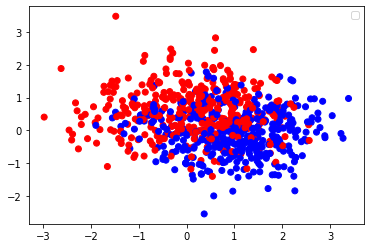

In [114]:
plt.scatter(x_train[:,0],x_train[:,1], c = train_colors)
plt.legend()

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron

In [92]:
from sklearn.ensemble import VotingClassifier

In [96]:
clf = VotingClassifier([("log_reg",LogisticRegression()),
                       ("tree", DecisionTreeClassifier(max_depth= 2)),
                       ("perceptron",Perceptron())],voting="hard")
learners = [LogisticRegression(),
           DecisionTreeClassifier(max_depth=2),
           Perceptron(),
           clf]

from sklearn.metrics import accuracy_score

for learner in learners:
    learner.fit(x_train, y_train)
    y_pred = learner.predict(x_test)
    print(f"{learner.__class__.__name__},accuracy= {accuracy_score(y_test,y_pred)}")

LogisticRegression,accuracy= 0.88
DecisionTreeClassifier,accuracy= 0.872
Perceptron,accuracy= 0.888
VotingClassifier,accuracy= 0.888


**As we can see Forest Trees compare diffrent algorithms and test which one is faster.** 

**Another method we could use is use the same algorithm for each predictor for every predictor and train each one on a different. Below we find the random subset of the training data.**

No handles with labels found to put in legend.


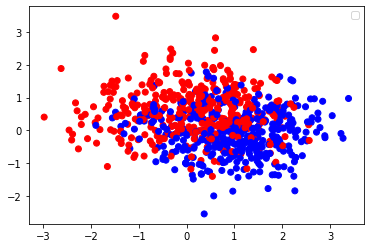

In [97]:
X,y = make_moons(n_samples=1000, noise=0.65,random_state=1 )
colors = ["blue " if label == 1 else "red" for label in y]
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(X, y)


train_colors = ["blue" if label == 1 else "red" for label in y_train]
test_colors = ["blue" if label == 1 else "red" for label in y_test]

plt.scatter(x_train[:,0],x_train[:,1], c = train_colors)
plt.legend()

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron



In [98]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier


#n_estimators = n_samples
#too 
rf_clf = RandomForestClassifier(n_estimators=750, max_leaf_nodes=6)

rf_clf.fit(x_train, y_train)
accuracy_score(y_test, rf_clf.predict(x_test))

0.772

**We then take a subset a group of the models and aggregate them. For reference, we set n_jobs equal to -1 to the model to do parallel computing.**

In [99]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(),
                           n_estimators=750,
                           bootstrap=True, n_jobs= -1)

bag_clf.fit(x_train, y_train)
accuracy_score(y_test, bag_clf.predict(x_test))

0.728

__**As we can see the random forest method did just as good as the the first method. But what would happen if we increased our depth? Would it perform better than our bootstrap method?**__


In [113]:
clf = VotingClassifier([("log_reg",LogisticRegression()),
                       ("tree", DecisionTreeClassifier(max_depth= 4)),
                       ("perceptron",Perceptron())],voting="hard")
learners = [LogisticRegression(),
           DecisionTreeClassifier(max_depth=2),
           Perceptron(),
           clf]

from sklearn.metrics import accuracy_score

for learner in learners:
    learner.fit(x_train, y_train)
    y_pred = learner.predict(x_test)
    print(f"{learner.__class__.__name__},accuracy= {accuracy_score(y_test,y_pred)}")

LogisticRegression,accuracy= 0.784
DecisionTreeClassifier,accuracy= 0.76
Perceptron,accuracy= 0.636
VotingClassifier,accuracy= 0.772


**Changing the max_depth to 5 did not really seem to do much of an affect on the accurary of the model. 
I think it is safe to condlude that perhaps the model**